In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('headbrain.csv')

In [3]:
df.shape

(237, 4)

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

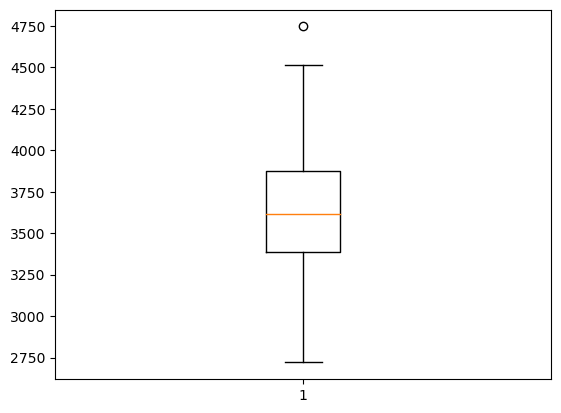

In [20]:
plt.boxplot(X)
plt.show()

In [23]:
pd.isna(X).sum()

0

In [27]:
X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1))
minmax = MinMaxScaler()
scale_x = minmax.fit_transform(X)
scale_y = minmax.fit_transform(y)

In [28]:
scale_x[:5]

array([[0.88406512],
       [0.50222003],
       [0.7602368 ],
       [0.52146029],
       [0.71879625]])

In [36]:
def gradientDescent(epochs, alpha):
    n = len(X)
    slope, inter = 0,0
    for i in range(epochs):
        y_pred = scale_x * slope + inter
        loss = y_pred - scale_y
        #print(np.sum(loss))
        gradSlope = (2/n) * np.dot(loss.T, scale_x)
        gradInter = (2/n) * np.sum(loss)
        slope = slope - gradSlope * alpha
        inter = inter - gradInter * alpha
    return slope, inter

In [58]:
epochs = 10000
alpha = 0.01
slope, inter = gradientDescent(epochs, alpha)

In [59]:
slope, inter

(array([[0.78241646]]), 0.12940368086748408)

In [60]:
n = len(X)
predictions = []
for i in range(n):
    y_pred = slope[0][0] * scale_x[i] + inter
    predictions.append(y_pred)

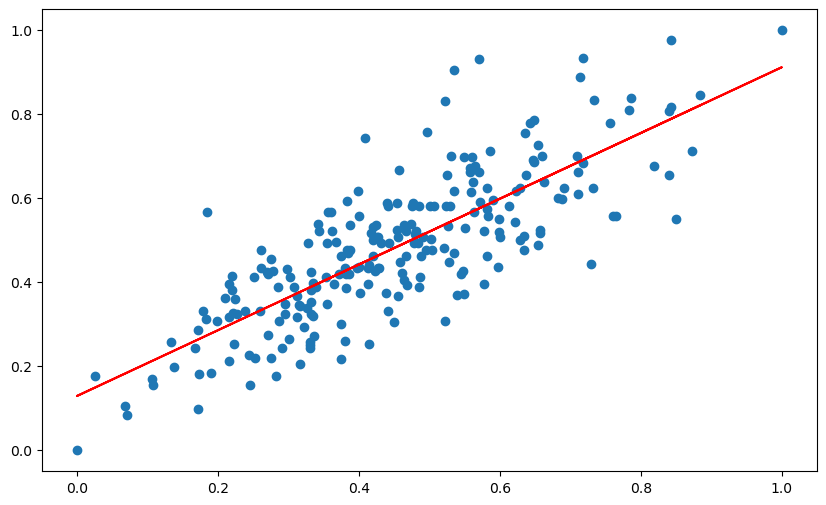

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(scale_x, scale_y)
plt.plot(scale_x, predictions, 'r')
plt.show()